## **Introduction to Regression with Neural Networks in Tensorflow**

There are many definitions for regression problem, but in our case we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter...predicting a number.

In [262]:
# import TensorFlow
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

### **Create a data to view and fit**

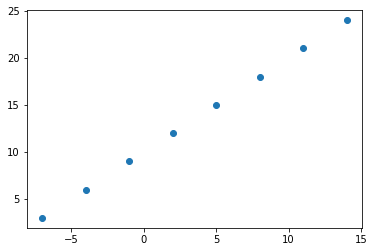

In [263]:
# Create the features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]).reshape(-1, 1)

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]).reshape(-1, 1)

plt.scatter(X, y);

In [264]:
y == X + 10

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### **Input and output shapes**

In [265]:
# One input value is predicting one output
X[0], y[0]

(array([-7.]), array([3.]))

In [266]:
# Turn NumPy arrays into tensors with dtype float 16
X = tf.cast(tf.constant(X), dtype=tf.float16)
y = tf.cast(tf.constant(y), dtype=tf.float16)
X, y

(<tf.Tensor: shape=(8, 1), dtype=float16, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float16)>,
 <tf.Tensor: shape=(8, 1), dtype=float16, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float16)>)

In [267]:
# Check the shapes of an input and output layers
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([1]), TensorShape([1]))

### **Steps in modeling with TensorFlow**

1. **Creating a model** - define `input and output layers`, as well as the `hidden layers` of a deep learning model. 
2. **Compiling a model** - prepare the model to be used with data; define:
    * `loss function` (how wrong the model's predictions are compared to the truth labels),
    * `optimizer` (hot the model should update its internal patterns to better its predictions),
    * `evaluation mertics` (human interpretable values for how well the model is doing).  
3. **Fitting the model** - let the model try to `find patterns` between X & y (features and labels).

In [268]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=['mae']) 

# 3. Fit the model
model.fit(X, y, epochs=5) # epochs is how many times the model will go through all of the training examples

Epoch 1/5
1/1 [==============================] - 0s 193ms/step - loss: 21.4073 - mae: 21.4073
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 21.0142 - mae: 21.0142
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 20.6210 - mae: 20.6210
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 20.2865 - mae: 20.2865
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 20.0053 - mae: 20.0053


In [269]:
# Check out X and Y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float16, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float16)>,
 <tf.Tensor: shape=(8, 1), dtype=float16, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float16)>)

In [270]:
# Try and make a prediction using our model
model.predict([17.0]) # should be 27.0

1/1 [==============================] - 0s 53ms/step


array([[-22.625345]], dtype=float32)

### **Improving the model**

We can improve our model by improving the steps we took to create a model.  
**What can be improved in each step**:
1. **Create a model:**
    * add more `layers`,
    * increase the `number of hidden units` (also caled neurons) within each of the hidden layers,
    * change `activation function` of each layer.
2. **Compiling a model:**
    * change the `optimization function`,
    * change the `learning rate` of optimization function.
3. **Fitting a model:**
    * fit a model for more `epochs` (leave it training for longer)
    * add `more data` (give it more examples to learn from)

**Increasing the number of `epochs`**

In [271]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 187ms/step - loss: 15.1617 - mae: 15.1617
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 14.9166 - mae: 14.9166
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 14.7841 - mae: 14.7841
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 14.6516 - mae: 14.6516
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 14.5191 - mae: 14.5191
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 14.3866 - mae: 14.3866
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 14.2541 - mae: 14.2541
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 14.1216 - mae: 14.1216
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 13.9891 - mae: 13.9891
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 13.8566 - mae: 13.8566
Epoch 11/100
1/1 [==============================] - 0s 2m

In [272]:
# Let's see if our model's prediction has improved...
model.predict([17.0]) # should be 27.0

1/1 [==============================] - 0s 60ms/step


array([[29.683046]], dtype=float32)

**Adding `one more hidden layer`, reducing the `number of hidden units` and changing the optimizer to `Adam`**

In [273]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 290ms/step - loss: 12.3366 - mae: 12.3366
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.5674 - mae: 11.5674
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 10.7915 - mae: 10.7915
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 10.0054 - mae: 10.0054
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 9.2068 - mae: 9.2068
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 8.3936 - mae: 8.3936
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 7.5634 - mae: 7.5634
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 6.8705 - mae: 6.8705
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9451 - mae: 6.9451
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 7.2274 - mae: 7.2274
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - los

In [274]:
# Let's see if our model's prediction has improved...
model.predict([17.0]) # should be 27.0

1/1 [==============================] - 0s 60ms/step


array([[26.803665]], dtype=float32)

### **Evaluating a model**

In practice, a typical workflow when building a neural network is:

```
Build a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it -> ...
```

When it comes to evaluation there are 3 important words:  
**"Visualise, visualise, visualise"**

It's a good idea to visualise:
* **The data** - what data are we working with? What does it look like?
* **The model itself**- what does a model look like?
* **The training of the model** - how does a model perform while it learns?
* **The predictions of the model** - how do the predictions of a model line up against the ground truth (the original labels)

In [288]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X = tf.reshape(X, shape=(50, 1))
X[:5]

<tf.Tensor: shape=(5, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84]])>

In [291]:
# Make labels for the dataset
y = X + 10
y[:5]

<tf.Tensor: shape=(5, 1), dtype=int32, numpy=
array([[-90],
       [-86],
       [-82],
       [-78],
       [-74]])>

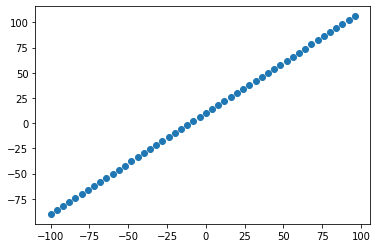

In [293]:
# Visualize the data
plt.scatter(X, y);

### **The 3 sets...**